In [1]:
from zipfile import ZipFile

file_name = "/content/klasifikasi sampah.zip"

with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

print('Done')

Done


In [8]:
pip install split-folders

In [10]:

import splitfolders, os
if not os.path.exists('data/train'):
    splitfolders.ratio('DATASETS', output='data', seed=42, ratio=(.7, .2, .1))
    print('Dataset berhasil dipisah')
else:
    print('Dataset sudah ada')


Copying files: 7014 files [00:02, 3361.83 files/s]

Dataset berhasil dipisah


In [11]:

import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/val', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print('Kelas:', class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)


Found 4907 files belonging to 6 classes.
Found 1401 files belonging to 6 classes.
Found 706 files belonging to 6 classes.
Kelas: ['Kaca', 'Kardus', 'Kertas', 'Logam', 'Plastik', 'Residu']


In [12]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.7014 - loss: 0.7801 - val_accuracy: 0.6517 - val_loss: 0.9497
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.6853 - loss: 0.8100 - val_accuracy: 0.6481 - val_loss: 0.9483
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.7022 - loss: 0.7752 - val_accuracy: 0.6510 - val_loss: 0.9469
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.7270 - loss: 0.7289 - val_accuracy: 0.6560 - val_loss: 0.9298
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.7268 - loss: 0.7195 - val_accuracy: 0.6574 - val_loss: 0.9620
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.7288 - loss: 0.7052 - val_accuracy: 0.6324 - val_loss: 1.0023
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.7213 - loss: 0.7030 - val_accuracy: 0.6660 - val_loss: 0.9560
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.7361 - loss: 0.6743 - val_accu

In [15]:
#loss
loss, acc = model.evaluate(test_ds)
print(f'Akurasi Test: {acc*100:.2f}%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6393 - loss: 1.0106
Akurasi Test: 64.02%


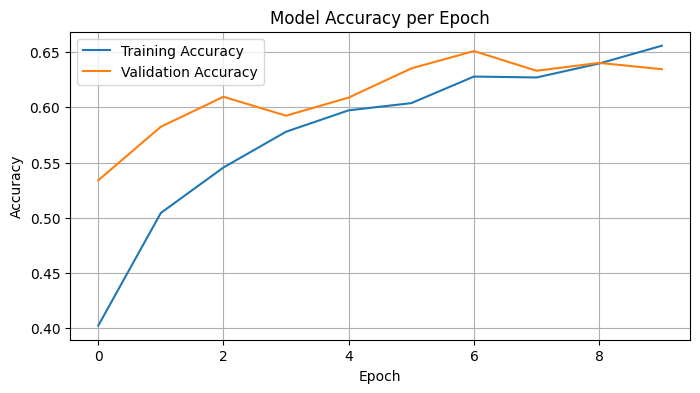

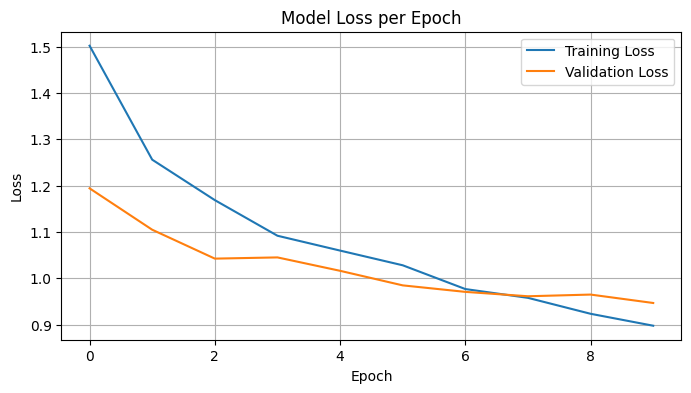

In [23]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('learning_curve_akurasi.png')
plt.show()

# Grafik Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('learning_curve_loss.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
 [[ 62   5   4  19  17   4]
 [  2  38  18   3   2   1]
 [  3   8 142   8  14   7]
 [ 10   3  13  80  13   2]
 [ 12   2  22   5  85   1]
 [  5   5  24   9 

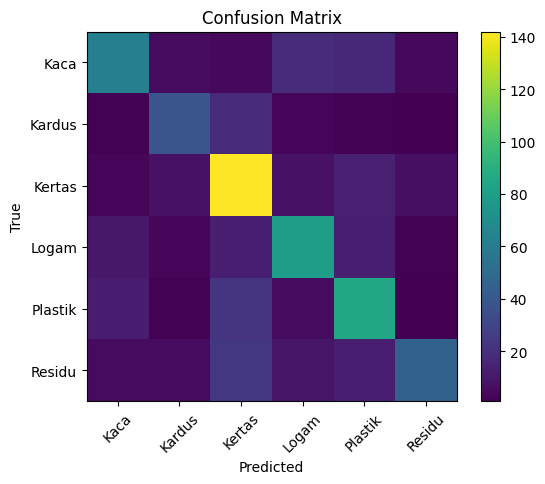

In [17]:

#confussion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_true, y_pred = [], []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', cm)
print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=class_names))

plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [18]:
model.save('waste_classifier.h5')
print('Model disimpan sebagai waste_classifier.h5')

Model disimpan sebagai waste_classifier.h5


In [19]:

from PIL import Image
import numpy as np

def predict_image(image_path):
    img = Image.open(image_path).resize(IMG_SIZE)
    img_array = np.expand_dims(img, axis=0)/255.0
    pred = model.predict(img_array)
    idx = np.argmax(pred)
    return class_names[idx], pred[0][idx]

# Contoh:
# label, prob = predict_image('path_ke_gambar_baru.jpg')
# print(f'Prediksi: {label} ({prob*100:.2f}%)')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


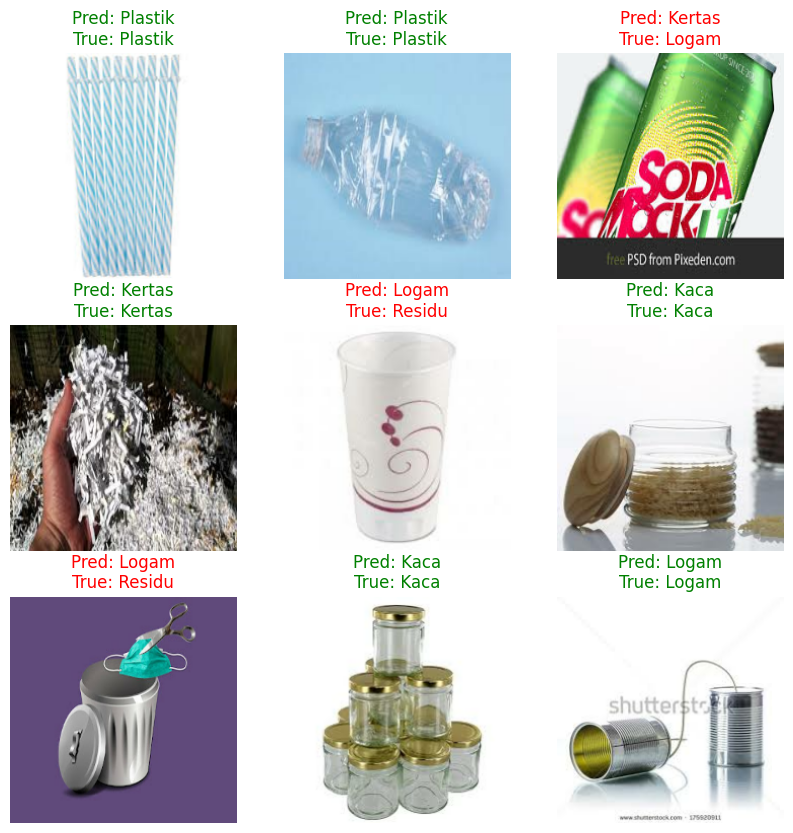

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        pred_label = class_names[np.argmax(preds[i])]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis("off")